## Import Module

In [13]:
import pandas as pd
from simager.ml import ConfigData, ConfigPreprocess, ConfigModel, AutoClassifier, load_model

## Import Data

In [2]:
df = pd.read_csv("../data/heart_disease.csv", index_col=False)
df.head()
# df = df[['chest_pain_type','exercise_induced_angina', 'st_slope','thalassemia','max_heart_rate_achieved','st_depression', 'num_major_vessels','target']]

,sex,chest_pain_type,exercise_induced_angina,st_slope,thalassemia,max_heart_rate_achieved,st_depression,num_major_vessels,target
0,male,asymptomatic,no,upsloping,normal,150,2.3,0,Heart Disease
1,male,non-anginal pain,no,upsloping,fixed defect,187,3.5,0,Heart Disease
2,female,atypical angina,no,downsloping,fixed defect,172,1.4,0,Heart Disease
3,male,atypical angina,no,downsloping,fixed defect,178,0.8,0,Heart Disease
4,female,typical angina,yes,downsloping,fixed defect,163,0.6,0,Heart Disease


## ML Configuration

In [3]:
# DATA CONFIGURATION

config_data = ConfigData(
    target="target",
    cat_features = ['sex','chest_pain_type','exercise_induced_angina', 'st_slope','thalassemia'],
    num_features = ['max_heart_rate_achieved','st_depression', 'num_major_vessels'],
    test_size = 0.2,
    random_state = 42
)
#     Args:
#         target (str, required): Name of the target column
#         cat_features (list, required): Column names of the categorical fields. Defaults to []
#         num_features (list, required): Column names of the numerical fields. Defaults to []
#         test_size (float, optional): Number of test size when spliting the data. Defaults to 0.2
#         random_state (int, optional): The random state that you provide is used as a seed to the random number generator. Defaults to 42

In [4]:
# PREPROCESSING CONFIGURATION

config_preprocess = ConfigPreprocess(
    cat_imputer="SimpleImputer", 
    num_imputer="SimpleImputer",
    scaler="RobustScaler",
    encoder="OneHotEncoder",
#     resample="oversampling"
)

# Args:
#     cat_imputer (str, optional): Imputation method for categorical fields. Defaults to None
#         you can only provide: `None` `SimpleImputer` method

#     num_imputer (str, optional): Imputation method for numerical fields. Defaults to None
#         you can choose: `None` `SimpleImputer` `KNNImputer`method

#     scaler (str, optional): Standardize a dataset along any axis. Defaults to None
#         you can choose: `None` `StandardScaler` `MinMaxScaler` `RobustScaler` `QuantileTransformer` `PowerTransformer` `Normalizer`

#     encoder (str, optional): Encoder method for categorical fields. Defaults to None
#         you can choose: `None` `OrdinalEncoder` `OneHotEncoder`

#     resample (str, optional): resampling method for handling unbalance data. Defaults to None
#         you can choose: `None` `oversampling` by SMOTE `undersampling` by AllKNN

In [5]:
config_model=ConfigModel(
    algorithm=[
    "DecisionTreeClassifier",
    "KNeighborsClassifier",
    "LogisticRegression",
    "SVC",
    "RandomForestClassifier",
    "AdaBoostClassifier",
    "XGBClassifier",
    "LGBMClassifier",
    "CatBoostClassifier"
    ],
    metrics="accuracy"
)

# Args:
#     algorithm (list, optional): Machine learning algorithm that you want to compare.
#         If not provide, this will be execute all algorithm
#         Available algorithms:
#             DecisionTreeClassifier
#             KNeighborsClassifier
#             LogisticRegression
#             SVC
#             RandomForestClassifier
#             AdaBoostClassifier
#             XGBClassifier
#             LGBMClassifier
#             CatBoostClassifier

#     metrics (str, optional): Evaluation metrics from the models. Default to `accuracy`
#         you can choose:
#             accuracy
#             precision
#             recall
#             f1


In [6]:
model = AutoClassifier(
    config_data = config_data,
    config_preprocess=config_preprocess,
    config_model=config_model
)

## Fit Model

In [7]:
model.fit(df)

2022-01-01 14:39:46,602 - ==================
2022-01-01 14:39:46,629 - DecisionTreeClassifier - accuracy: 0.711864406779661
2022-01-01 14:39:46,659 - KNeighborsClassifier - accuracy: 0.7966101694915254
2022-01-01 14:39:46,692 - LogisticRegression - accuracy: 0.8135593220338984
2022-01-01 14:39:46,722 - SVC - accuracy: 0.847457627118644
2022-01-01 14:39:46,880 - RandomForestClassifier - accuracy: 0.7627118644067796
2022-01-01 14:39:46,979 - AdaBoostClassifier - accuracy: 0.7796610169491526
/opt/anaconda3/envs/tikbot/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
2022-01-01 14:39:47,057 - XGBClassifier -

[14:39:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2022-01-01 14:39:47,887 - CatBoostClassifier - accuracy: 0.8135593220338984
2022-01-01 14:39:47,890 - ==================
2022-01-01 14:39:47,890 - Best Model SVC with accuracy: 0.847457627118644
2022-01-01 14:39:47,891 - ==================
2022-01-01 14:39:47,895 - Classification Report


                  precision    recall  f1-score   support

   Heart Disease       0.83      0.91      0.87        33
No Heart Disease       0.87      0.77      0.82        26

        accuracy                           0.85        59
       macro avg       0.85      0.84      0.84        59
    weighted avg       0.85      0.85      0.85        59



## Hyperparameters Tuning

In [8]:
model.hp_tuning(
    search="bayes",
    params=None, # using recommendation from simager, you can specified if you want
    n_jobs=None,
    cv=5,
    verbose=1
)

# Args:
#     search(str, optional): Searching method to run hyperparameters tunning. Default to `bayes`
#         `bayes` (BayesSearchCV): Bayesian optimization over hyper parameters.
#         `grid` (GridSearchCV): Grid optimization over hyper parameters.

#     params (dict, optional): Parameters tunning, default to None
#         If None, parameter will be use recommendation from simager

#     n_jobs (int, optional): Number of jobs to run in parallel. Default to None
#         If None, means that (cpu_count - 1)

#     cv (int, optional): Determines the cross-validation splitting strategy. Defaults to 5

#     return_model (bool, optional): Return model object. Default to False

#     verbose (int, optional): Controls the verbosity: the higher, the more messages. Default to 0
#         Values: 0-3

2022-01-01 14:39:47,950 - Hyperparameter tuning using: {'estimator__gamma': Real(low=0.001, high=1000, prior='log-uniform', transform='identity'), 'estimator__C': Real(low=0.001, high=1000, prior='log-uniform', transform='identity'), 'estimator__kernel': Categorical(categories=('rbf', 'poly', 'sigmoid'), prior=None)}


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

2022-01-01 14:41:14,811 - Best Params: OrderedDict([('estimator__C', 24.55385695357975), ('estimator__gamma', 0.001), ('estimator__kernel', 'rbf')])
2022-01-01 14:41:14,826 - Classification Report


                  precision    recall  f1-score   support

   Heart Disease       0.83      0.91      0.87        33
No Heart Disease       0.87      0.77      0.82        26

        accuracy                           0.85        59
       macro avg       0.85      0.84      0.84        59
    weighted avg       0.85      0.85      0.85        59



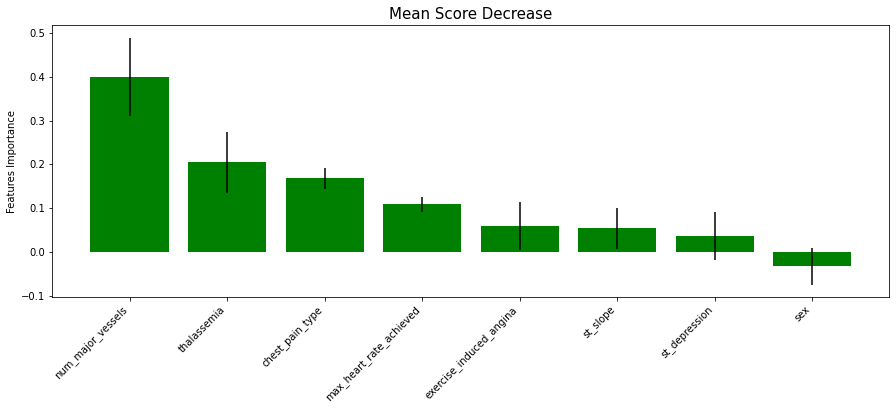

In [9]:
# Calculate features importance from the best model
model.features_importance()

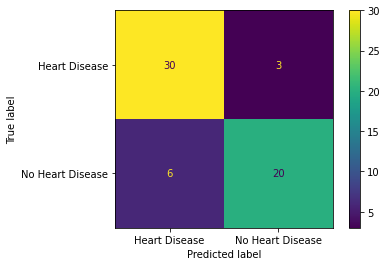

In [10]:
# Calculate confusion matrix from the best model
model.confusion_matrix()

In [11]:
# Save model
model.save("model/best_model.pkl")

# Args:
#     model_path (str, optional): Path to file model name, default to `model/best_model.pkl`

In [12]:
# Load model
model = load_model("model/best_model.pkl")